In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [6]:
# Read the dataset and create a DataFrame using pandas
penguin_dataset = pd.read_csv('penguins.csv')
penguins = pd.DataFrame(penguin_dataset)

In [7]:
# Check the dataset information and statistics
print("Dataset Information:")
print(penguins.info())
print("Dataset Statistics:")
print(penguins.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None
Dataset Statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.1000

In [8]:
# Define a function to impute missing data with the mean of the respective columns
def impute_numeric_missing_data(data_frame, field_name):
    data_frame[field_name] = data_frame[field_name].fillna(data_frame[field_name].mean())


In [9]:
# Apply imputation to numeric columns
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']
for column in numeric_columns:
    impute_numeric_missing_data(penguins, column)

In [10]:
# Define a function to remove outliers using the IQR method
def remove_outliers(data_frame, field_name):
    q1 = np.percentile(data_frame[field_name], 25)
    q3 = np.percentile(data_frame[field_name], 75)
    iqr = 1.5 * (q3 - q1)
    lower_bound = q1 - iqr
    upper_bound = q3 + iqr

    data_frame = data_frame[(data_frame[field_name] >= lower_bound) & (data_frame[field_name] <= upper_bound)]


In [11]:
# Remove outliers from numeric columns
for column in numeric_columns:
    remove_outliers(penguins, column)

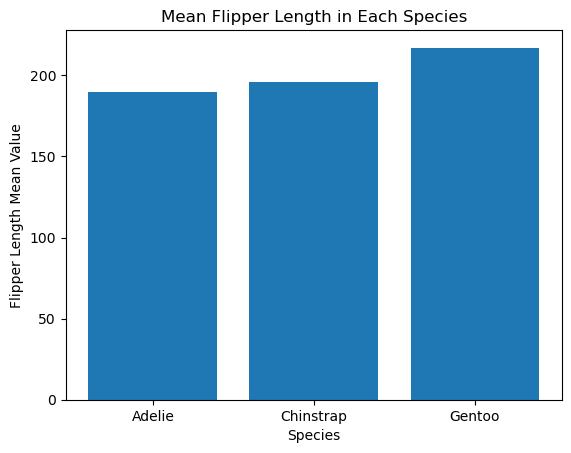

In [12]:
# Plotting a graph of species vs flipper length mean
flipper_length_mean = penguins.groupby("species")[["flipper_length_mm"]].mean()
plt.bar(flipper_length_mean.index, flipper_length_mean['flipper_length_mm'])
plt.title("Mean Flipper Length in Each Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length Mean Value")
plt.show()

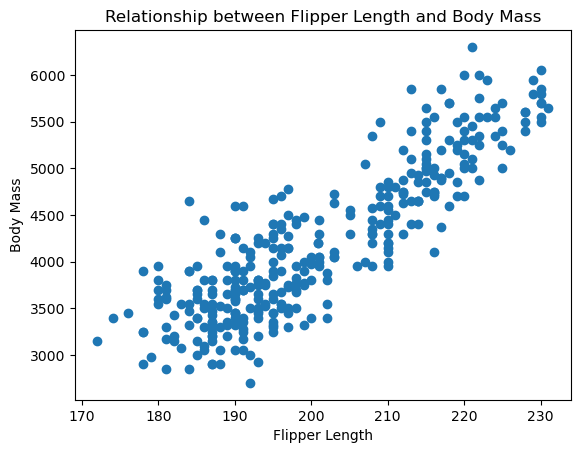

In [13]:
# Plot a scatter plot to investigate the relationship between flipper length and body mass
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])
plt.title("Relationship between Flipper Length and Body Mass")
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")
plt.show()


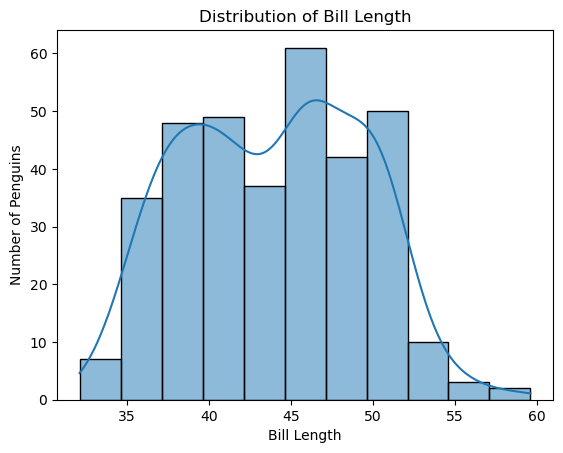

In [14]:
# Plot a density distribution graph to see the distribution of bill length
sns.histplot(penguins['bill_length_mm'], kde=True)
plt.title("Distribution of Bill Length")
plt.xlabel("Bill Length")
plt.ylabel("Number of Penguins")
plt.show()


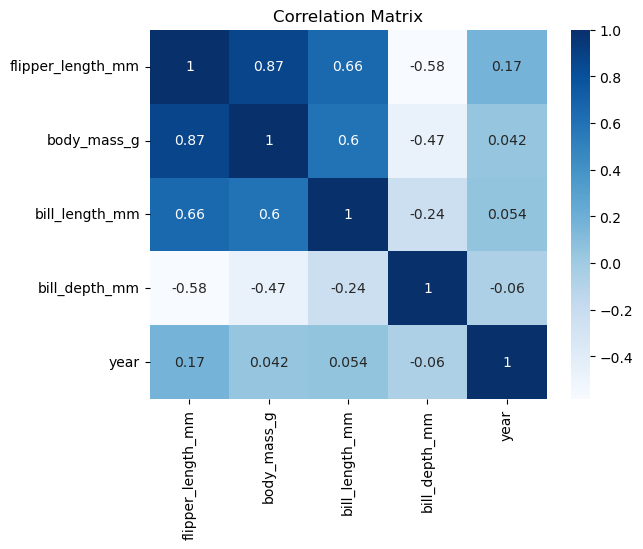

In [15]:
# Plot a heatmap of numeric columns to check the correlation between the columns
numeric_columns = ['flipper_length_mm', 'body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'year']
correlation_matrix = penguins[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

In [16]:
# Drop the 'year' column as it may not be relevant
penguins.drop('year', axis=1, inplace=True)

In [17]:
# Define a function to perform label encoding and mode replacement
def label_encode_and_replace_mode(data_frame, column_name):
    data_frame.loc[:, column_name] = data_frame.loc[:, column_name].astype('category').cat.codes
    mode_value = data_frame[data_frame[column_name] != -1][column_name].mode()[0]
    data_frame.loc[:, column_name] = data_frame.loc[:, column_name].replace(-1, mode_value)

# Apply label encoding and mode replacement to categorical columns
categorical_columns = ['species', 'sex', 'island']
for column in categorical_columns:
    label_encode_and_replace_mode(penguins, column)

penguins

C:\Users\Shriganesh Lokapure\AppData\Local\Temp\ipykernel_18336\3827997587.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_frame.loc[:, column_name] = data_frame.loc[:, column_name].astype('category').cat.codes
C:\Users\Shriganesh Lokapure\AppData\Local\Temp\ipykernel_18336\3827997587.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_frame.loc[:, column_name] = data_frame.loc[:, column_name].astype('category').cat.codes
C:\Users\Shriganesh Lokapure\AppData\Local\Temp\ipykernel_18336\3827997587.py:3: DeprecationWarning: In a 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0
...,...,...,...,...,...,...,...
339,1,1,55.80000,19.80000,207.000000,4000.000000,1
340,1,1,43.50000,18.10000,202.000000,3400.000000,0
341,1,1,49.60000,18.20000,193.000000,3775.000000,1
342,1,1,50.80000,19.00000,210.000000,4100.000000,1


In [18]:
# Define a function to normalize columns
def normalize_columns(data_frame, field_name):
    max_value = data_frame[field_name].max()
    min_value = data_frame[field_name].min()
    data_frame[field_name] = (data_frame[field_name] - min_value) / (max_value - min_value)


In [19]:
# Normalize numeric columns
for column in numeric_columns:
    if column != 'year':
        normalize_columns(penguins, column)

In [20]:
# Save the preprocessed data to a CSV file
penguins.to_csv("penguins_preprocessed.csv", index=False)

# Read the preprocessed dataset
penguin_dataset = pd.read_csv('penguins_preprocessed.csv')
penguins_processed = pd.DataFrame(penguin_dataset)

In [21]:
# Check the dataset information and statistics after preprocessing
print("Preprocessed Dataset Information:")
print(penguins_processed.info())
print("Preprocessed Dataset Statistics:")
print(penguins_processed.describe())

Preprocessed Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB
None
Preprocessed Dataset Statistics:
          species      island  bill_length_mm  bill_depth_mm  \
count  344.000000  344.000000      344.000000     344.000000   
mean     0.918605    0.662791        0.429888       0.482282   
std      0.893320    0.726194        0.197951       0.234408   
min      0.000000    0.000000        0.000000       0.000000   
25%      0.000000    

In [22]:
# Split the data into training and testing sets (80% and 20%)
training_data = int(np.round(len(penguins_processed) * 0.8))
testing_data = len(penguins_processed) - training_data


In [23]:
X_train = penguins_processed.drop('sex', axis=1)[:training_data]
X_test = penguins_processed.drop('sex', axis=1)[-testing_data:]
Y_train = penguins_processed['sex'][:training_data]
Y_test = penguins_processed['sex'][-testing_data:]

In [24]:
# 1st Code
class LogitRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, y_train, x_train):
        z = np.dot(x_train, self.weights) + self.bias
        h = self.sigmoid(z)

        parameter1 = -(y_train) * np.log(h)
        parameter2 = (1 - y_train) * np.log(1 - h)

        j = (1 / len(y_train)) * np.sum(parameter1 - parameter2)

        return j

    def gradient_descent(self, y_train, x_train):
        z = np.dot(x_train, self.weights) + self.bias
        pred = self.sigmoid(z)

        difference_y = pred - y_train

        update_weight = np.dot(x_train.T, difference_y) / len(y_train)
        update_bias = np.sum(difference_y) / len(y_train)

        return update_weight, update_bias

    def fit(self, x_train, y_train, x_val=None, y_val=None):
        rows, features = x_train.shape
        self.weights = np.random.uniform(0, 1, features)
        self.bias = 0.5
        loss = []

        if x_val is not None and y_val is not None:
            best_loss = float("inf")

        print(f"Training Logistic Regression for {self.iterations} iterations")
        for i in range(self.iterations):
            updated_weights, updated_bias = self.gradient_descent(y_train, x_train)
            loss_value = self.cost(y_train, x_train)
            loss.append(loss_value)

            self.weights -= self.learning_rate * updated_weights
            self.bias -= self.learning_rate * updated_bias

            # Early stopping: Check loss on validation set and stop if it increases
            if x_val is not None and y_val is not None:
                val_loss = self.cost(y_val, x_val)
                if val_loss > best_loss:
                    print("Validation loss increased. Stopping early.")
                    break
                best_loss = val_loss

        print("Training completed.")
        pickle.dump(self.weights, open(f"logistic_regression_weights_{self.iterations}.pickle", "wb"))

        # Plot the gradient descent process
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(loss)), loss)
        plt.title("Gradient Descent Progress")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.show()

        return self.weights, loss
    
    def scaling(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_scaled = (X - mean) / std
        return X_scaled

    def predict(self, x_test):
        X_scaled = self.scaling(x_test)
        z = np.dot(X_scaled, self.weights.T) + self.bias
        y_hat = self.sigmoid(z)

        y_pred = [1 if y_value >= 0.5 else 0 for y_value in y_hat]

        return y_pred

In [25]:
# Function for calculating accuracy
def get_accuracy(y_test, y_pred):
    matched_values = np.sum(y_test == y_pred)
    return matched_values / len(y_test)

In [26]:
# Function for hyperparameter tuning
def hyperparameter_tuning(X_train, Y_train, X_test, Y_test, learning_rates, num_iterations):
    best_accuracy = 0.0
    best_hyperparameters = {'learning_rate': None, 'iterations': None, 'weights': None}
    best_loss = float("inf")
    
    # Store the results for all combinations
    results = []

    for lr in learning_rates:
        print(f"Learning Rate: {lr}")
        for iterations in num_iterations:
            model = LogitRegression(lr, iterations)
            weights, loss = model.fit(X_train, Y_train)
            predictions = model.predict(X_test)
            accuracy = get_accuracy(Y_test, predictions)
            print(f"Iterations: {iterations}, Accuracy: {accuracy}, Loss: {loss[-1]:.2f}")
            
            # Store the results for this combination
            result = {
                'learning_rate': lr,
                'iterations': iterations,
                'accuracy': accuracy,
                'weights': weights,
                'loss': loss
            }
            results.append(result)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_hyperparameters['learning_rate'] = lr
                best_hyperparameters['iterations'] = iterations
                best_hyperparameters['weights'] = weights

           
    return best_hyperparameters, best_accuracy


Learning Rate: 0.001
Training Logistic Regression for 1000 iterations
Training completed.


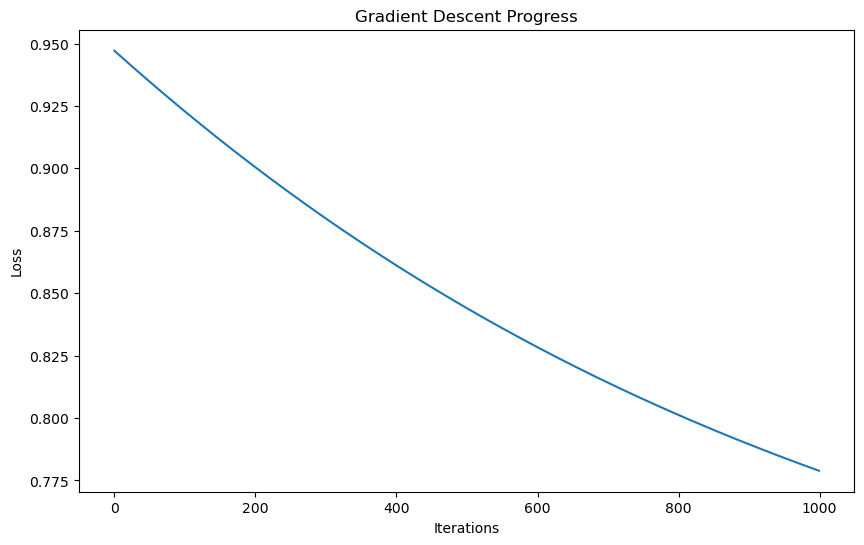

Iterations: 1000, Accuracy: 0.8405797101449275, Loss: 0.78
Training Logistic Regression for 10000 iterations
Training completed.


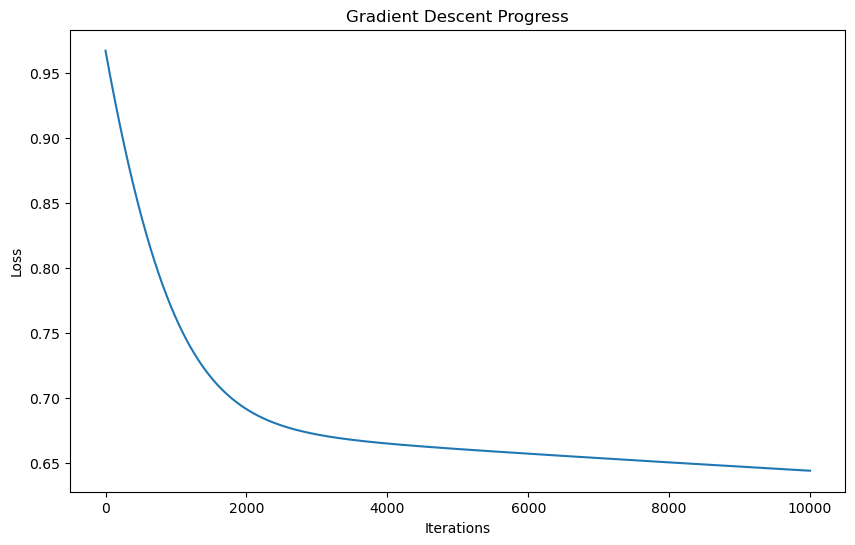

Iterations: 10000, Accuracy: 0.855072463768116, Loss: 0.64
Training Logistic Regression for 100000 iterations
Training completed.


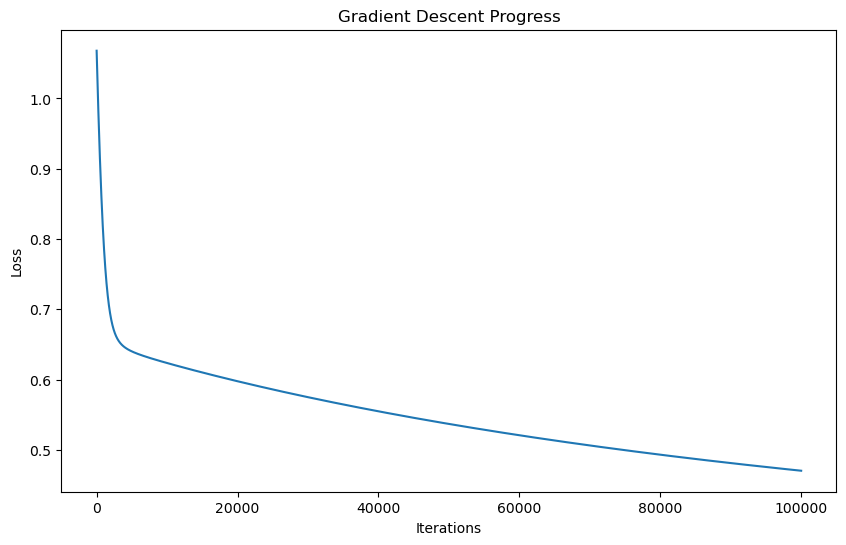

Iterations: 100000, Accuracy: 0.855072463768116, Loss: 0.47
Learning Rate: 0.01
Training Logistic Regression for 1000 iterations
Training completed.


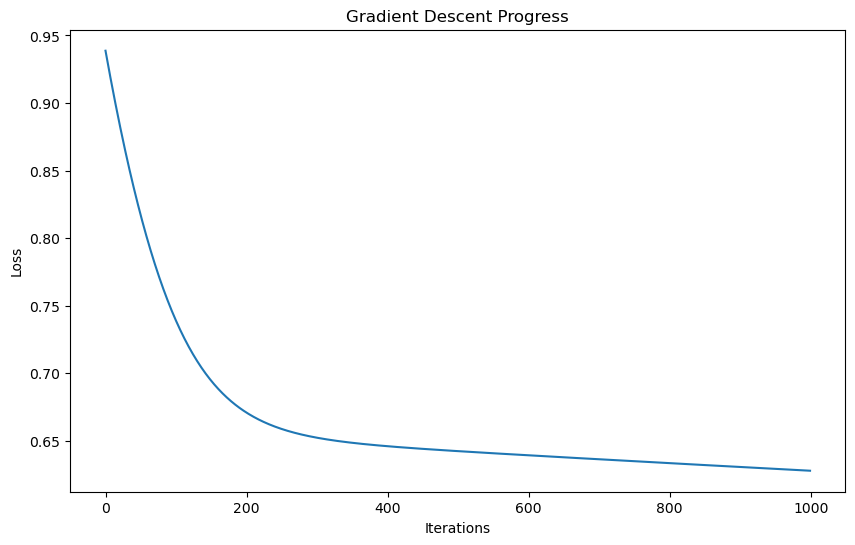

Iterations: 1000, Accuracy: 0.855072463768116, Loss: 0.63
Training Logistic Regression for 10000 iterations
Training completed.


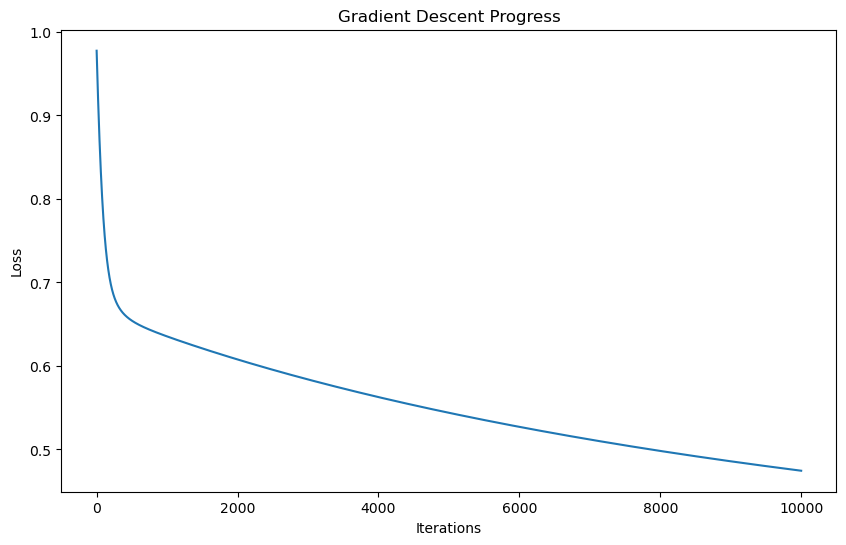

Iterations: 10000, Accuracy: 0.855072463768116, Loss: 0.47
Training Logistic Regression for 100000 iterations
Training completed.


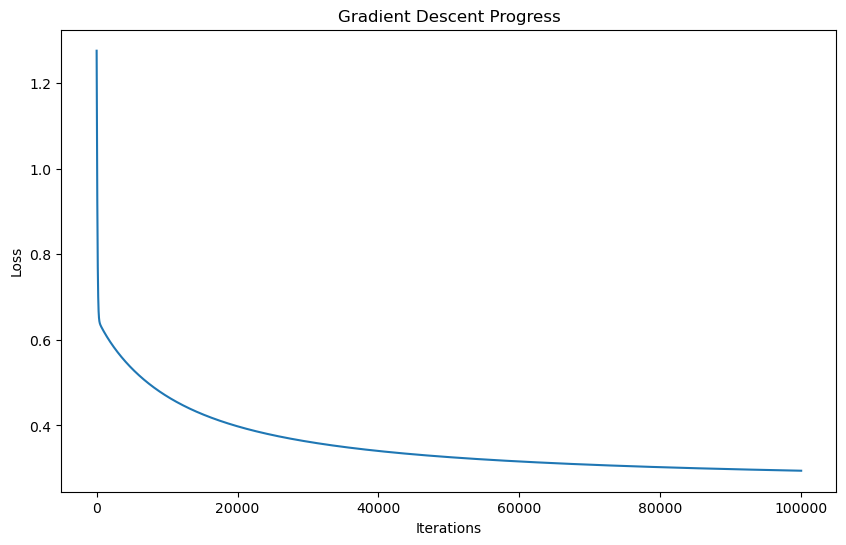

Iterations: 100000, Accuracy: 0.8405797101449275, Loss: 0.29
Learning Rate: 0.1
Training Logistic Regression for 1000 iterations
Training completed.


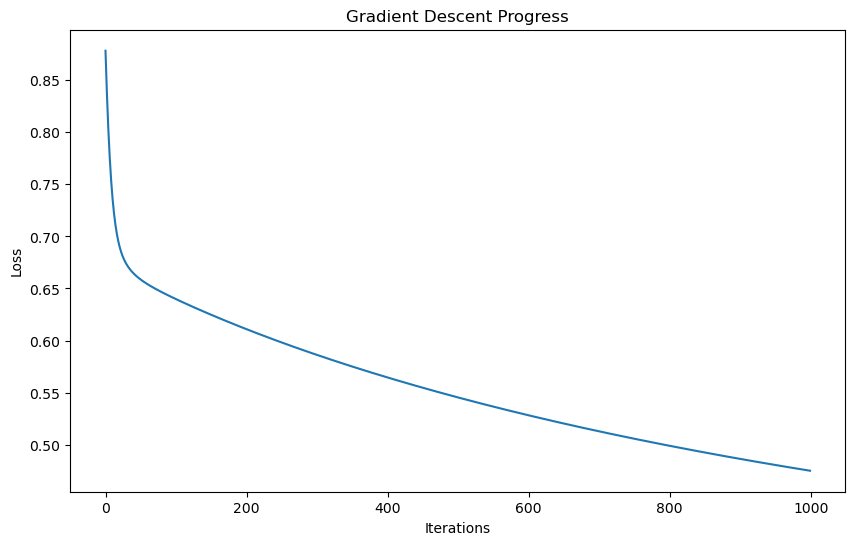

Iterations: 1000, Accuracy: 0.855072463768116, Loss: 0.47
Training Logistic Regression for 10000 iterations
Training completed.


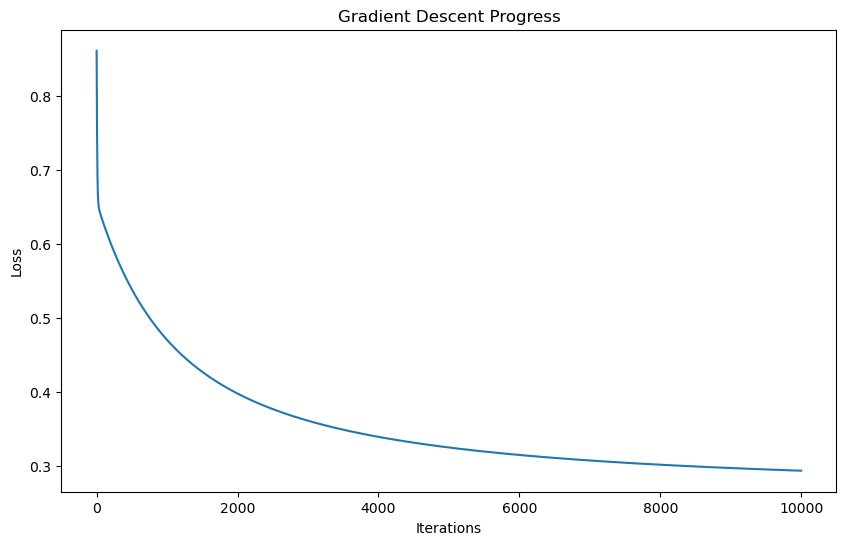

Iterations: 10000, Accuracy: 0.8260869565217391, Loss: 0.29
Training Logistic Regression for 100000 iterations
Training completed.


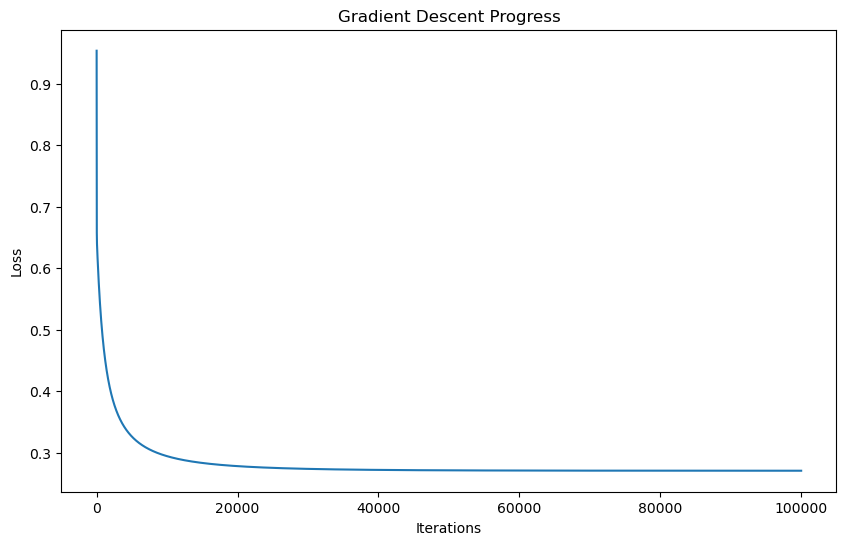

Iterations: 100000, Accuracy: 0.8260869565217391, Loss: 0.27
Best Hyperparameters: {'learning_rate': 0.001, 'iterations': 10000, 'weights': array([-0.08605597, -0.05173874,  0.26739637,  0.49942264, -0.0096732 ,
        0.50320103])}
Best Accuracy: 85.5072463768116 %


In [28]:
# Define a wider range of learning rates and iterations for grid search
learning_rates = [0.001, 0.01, 0.1 ]
num_iterations = [1000, 10000, 100000]

# Perform hyperparameter tuning
best_hyperparameters, best_accuracy = hyperparameter_tuning(X_train, Y_train, X_test, Y_test, learning_rates, num_iterations)

print("Best Hyperparameters:", best_hyperparameters)
print("Best Accuracy:", best_accuracy * 100, "%")